# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [3]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.8,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.6666666666666666

# Первая часть. Исследование

In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /Users/nikto/Jupyter/DL MIPT/Hw3/train.csv
100%|█████████████████████████████████████████| 664k/664k [00:01<00:00, 513kB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /Users/nikto/Jupyter/DL MIPT/Hw3/test.csv
100%|█████████████████████████████████████████| 218k/218k [00:00<00:00, 456kB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /Users/nikto/Jupyter/DL MIPT/Hw3/submission.csv
100%|██████████████████████████████████████| 14.7k/14.7k [00:00<00:00, 24.4MB/s]


In [118]:
data = pd.read_csv('./train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [107]:
for i in data.columns:
    contains_empty = ((data[i] == ' ') | (data[i].isna())).any()
    print(i, ": ", contains_empty)

ClientPeriod :  False
MonthlySpending :  False
TotalSpent :  True
Sex :  False
IsSeniorCitizen :  False
HasPartner :  False
HasChild :  False
HasPhoneService :  False
HasMultiplePhoneNumbers :  False
HasInternetService :  False
HasOnlineSecurityService :  False
HasOnlineBackup :  False
HasDeviceProtection :  False
HasTechSupportAccess :  False
HasOnlineTV :  False
HasMovieSubscription :  False
HasContractPhone :  False
IsBillingPaperless :  False
PaymentMethod :  False
Churn :  False


In [278]:
data.loc[data['TotalSpent'] == ' ', 'TotalSpent'] = '0'
data['TotalSpent'] = data['TotalSpent'].astype(float)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [248]:
y = data[target_col]
X = data.drop(target_col, axis=1)

In [249]:
y.unique()

array([0, 1])

In [250]:
X.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
dtype: object

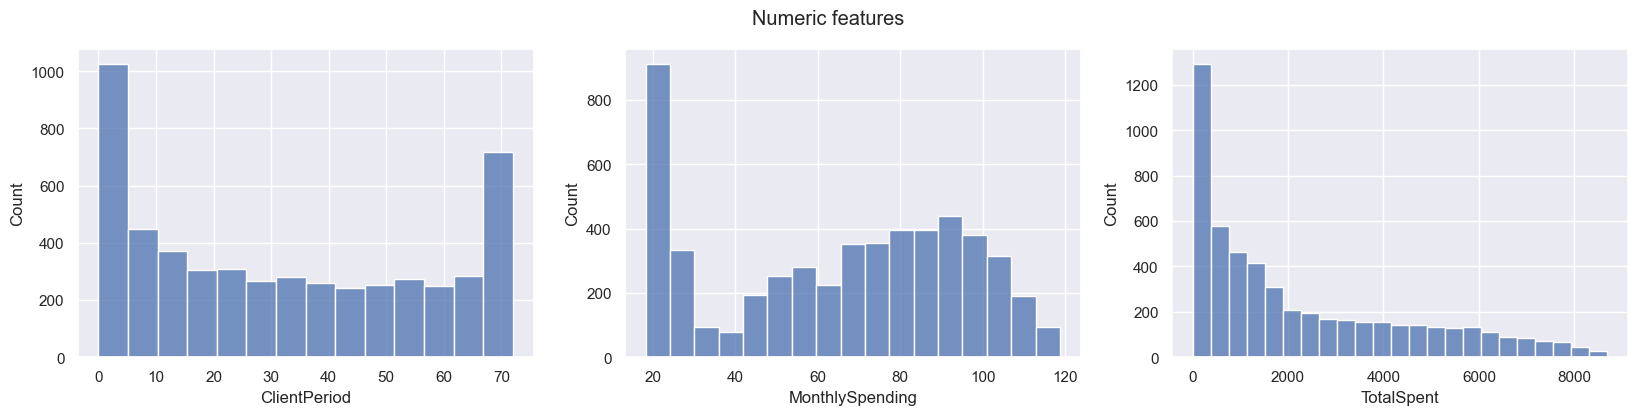

In [252]:
sns.set(rc={'figure.figsize':(20,4)})

figure, axis = plt.subplots(1, 3)

def show_histplot(x, coords, xlabel, ylabel):
    sns.histplot(x = x, ax=axis[coords])
    axis[coords].set_xlabel(xlabel)
    axis[coords].set_ylabel(ylabel)


ylabel = 'Count'

for i, num_col in enumerate(num_cols):
    show_histplot(X[num_col], i, num_col, ylabel)


figure.suptitle('Numeric features')

plt.show()

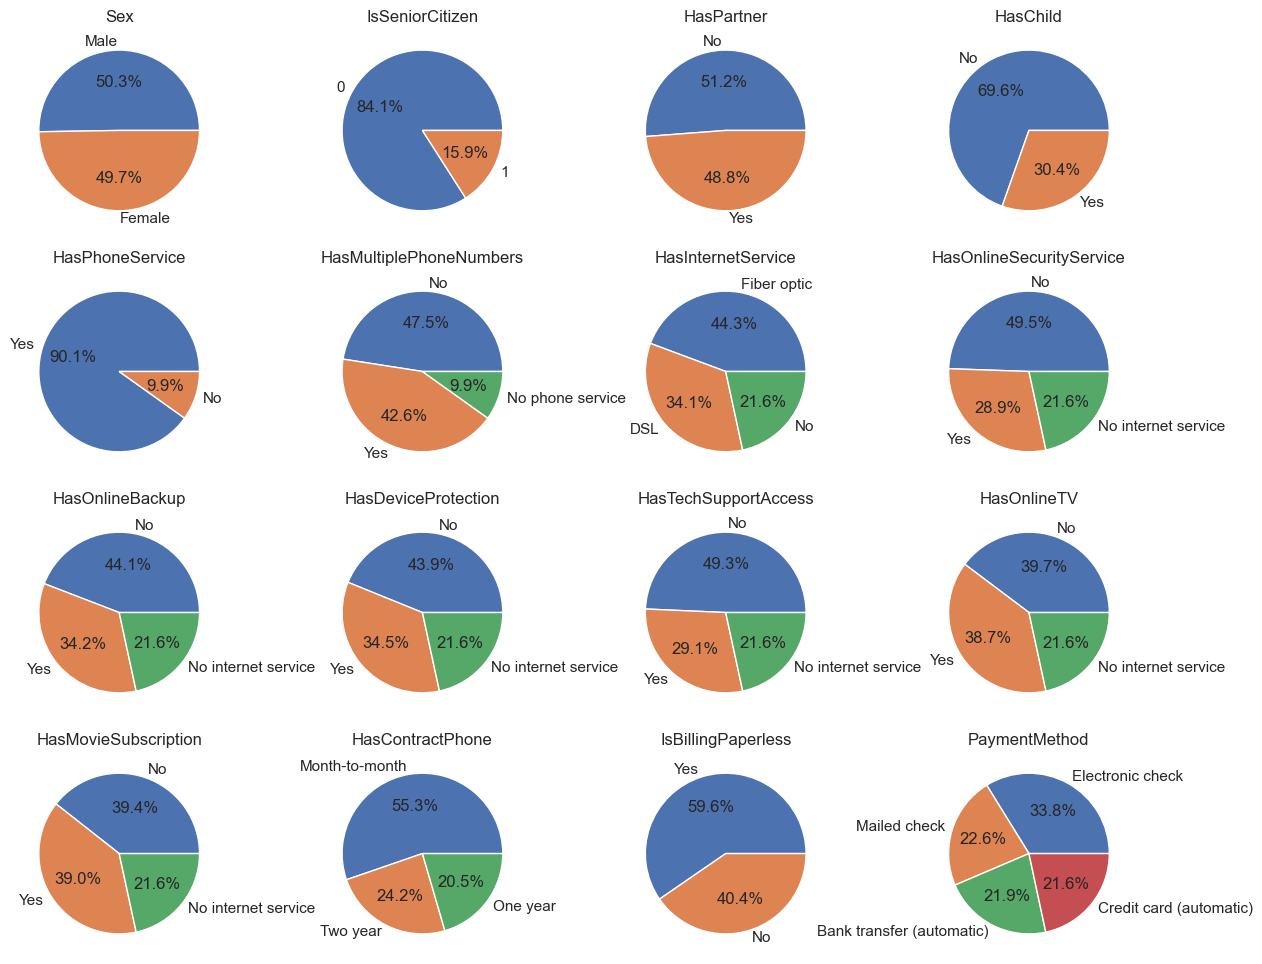

In [253]:
sns.set(rc={'figure.figsize':(15,12)})

def show_pie(x, coords, name):
    df = x.value_counts()
    ax = plt.subplot(4, 4, i+1)
    plt.pie(x = df.values, labels = list(df.index), autopct='%1.1f%%')
    ax.set_title(name)


ylabel = 'Count'

for i, cat_col in enumerate(cat_cols):
    show_pie(X[cat_col], i, cat_col)


figure.suptitle('Numeric features')

plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [203]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [366]:
def search_best_params(pipline, params, params_name):
    searcher = GridSearchCV(pipline, [{params_name: params}],
                        scoring="roc_auc", n_jobs=-1, cv=5)
    searcher.fit(X, y)

    best_param = searcher.best_params_[params_name]
    best_score = searcher.best_score_

    print("Best param = ", best_param)
    print("With best csore = ", best_score)

    plt.plot(params, searcher.cv_results_["mean_test_score"])
    plt.xlabel("params")
    plt.ylabel("roc auc score")
    plt.show()
    return searcher.best_estimator_

Best param =  37.92690190732246
With best csore =  0.8451315772510581


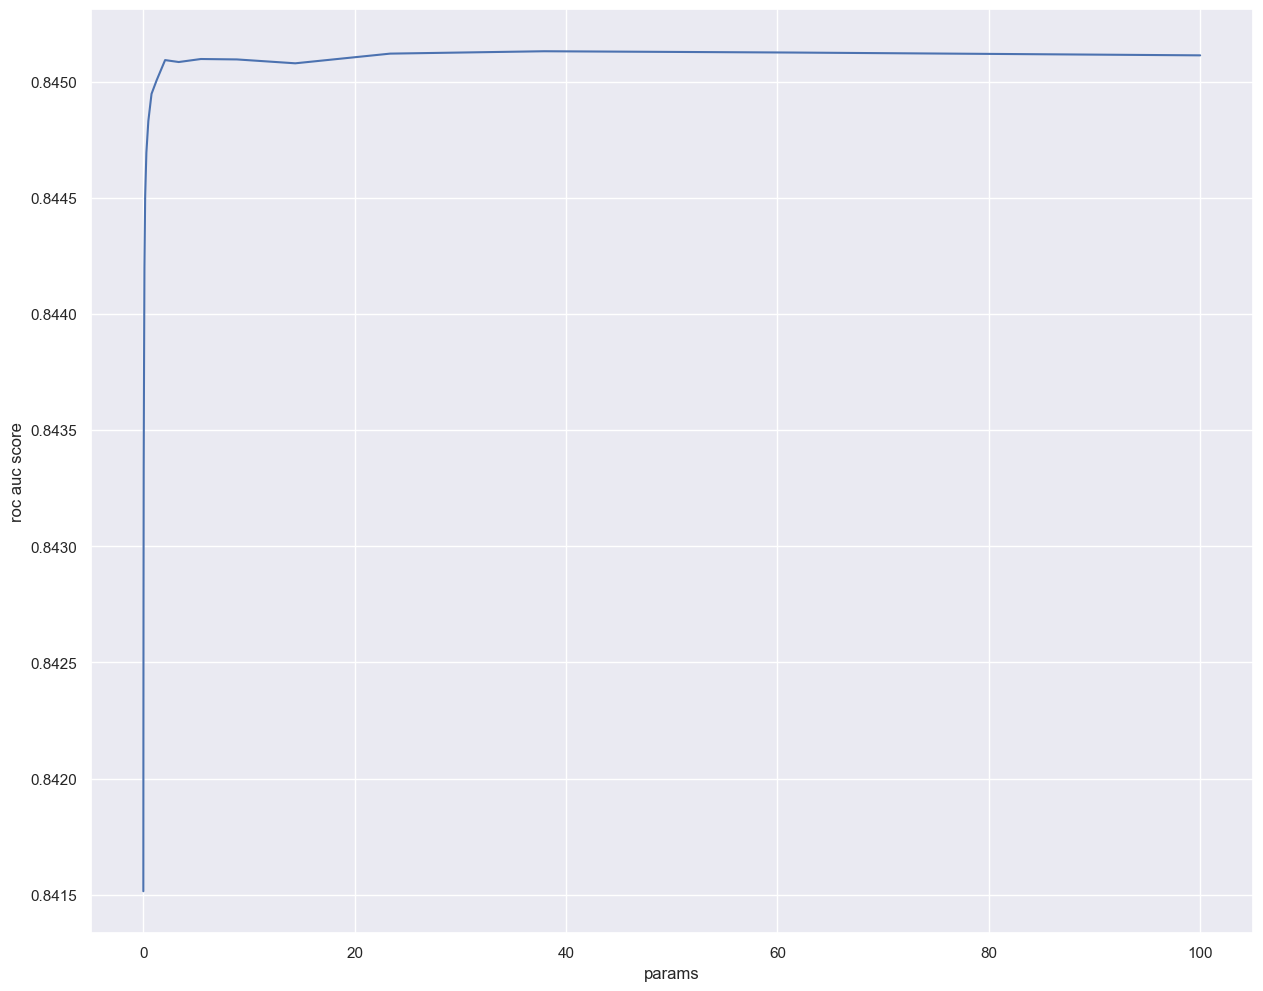

In [406]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ('scaling', StandardScaler(), num_cols)
])

pipeline_log_regression = Pipeline(steps=[
    ('ohe+scaling', column_transformer),
    ('regression', LogisticRegression(max_iter=10000))
])


params = alphas = np.logspace(-2, 2, 20)

log_model = search_best_params(pipeline_log_regression, params, 'regression__C')

In [295]:
X_test = pd.read_csv('./test.csv')
X_test.loc[X_test['TotalSpent'] == ' ', 'TotalSpent'] = '0'
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)

In [296]:
y_pred = model.predict(X_test)
ans = pd.DataFrame()
ans['id'] = np.arange(len(y_pred))
ans[target_col] = y_pred

ans
ans.to_csv("ans.csv", encoding='utf-8', index=False)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество метрики roc auc =  $0.72617$, при параметре c = 37.92690190732246

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

## Поиск лучших параметров

In [299]:
import catboost 

### Перебор комбинация

In [304]:
boosting_model = catboost.CatBoostClassifier(silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC:hints=skip_train~false',
                                             )
boosting_model.grid_search({'l2_leaf_reg': np.logspace(-1, 1, 4),
                            'n_estimators': 100 * (1+ np.arange(3)),
                            'learning_rate': np.logspace(-4, 0, 4)}, 
                           X_train, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8127549972
bestIteration = 99

0:	loss: 0.8127550	best: 0.8127550 (0)	total: 610ms	remaining: 28.7s

bestTest = 0.8185447181
bestIteration = 49

1:	loss: 0.8185447	best: 0.8185447 (1)	total: 1.15s	remaining: 26.4s

bestTest = 0.8385519094
bestIteration = 99

2:	loss: 0.8385519	best: 0.8385519 (2)	total: 1.65s	remaining: 24.8s

bestTest = 0.8225696381
bestIteration = 2

3:	loss: 0.8225696	best: 0.8385519 (2)	total: 2.26s	remaining: 24.9s

bestTest = 0.8175173912
bestIteration = 18

4:	loss: 0.8175174	best: 0.8385519 (2)	total: 2.92s	remaining: 25.1s

bestTest = 0.8190510435
bestIteration = 73

5:	loss: 0.8190510	best: 0.8385519 (2)	total: 3.62s	remaining: 25.4s

bestTest = 0.8423566879
bestIteration = 99

6:	loss: 0.8423567	best: 0.8423567 (6)	total: 4.12s	remaining: 24.2s

bestTest = 0.8212414512
bestIteration = 9

7:	loss: 0.8212415	best: 0.8423567 (6)	total: 4.78s	remaining: 23.9s

bestTest = 0.8137529719
bestIteration = 82

8:	loss: 0.8137530	best: 0.8423567 (6)	total:

{'params': {'iterations': 100,
  'learning_rate': 0.046415888336127774,
  'l2_leaf_reg': 2.1544346900318834},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44

### Поиск лучшего количества моделей

In [318]:
boosting_model = catboost.CatBoostClassifier(l2_leaf_reg = 2.1544346900318834,
                                             learning_rate = 0.046415888336127774,
                                             silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC:hints=skip_train~false',
                                             )
boosting_model.grid_search({'n_estimators': 10 * (1 + np.arange(20)) }, 
                           X_train, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8127733423
bestIteration = 9

0:	loss: 0.8127733	best: 0.8127733 (0)	total: 125ms	remaining: 2.38s

bestTest = 0.8303589774
bestIteration = 19

1:	loss: 0.8303590	best: 0.8303590 (1)	total: 262ms	remaining: 2.36s

bestTest = 0.8358735214
bestIteration = 29

2:	loss: 0.8358735	best: 0.8358735 (2)	total: 434ms	remaining: 2.46s

bestTest = 0.8398287299
bestIteration = 39

3:	loss: 0.8398287	best: 0.8398287 (3)	total: 689ms	remaining: 2.76s

bestTest = 0.8408230356
bestIteration = 43

4:	loss: 0.8408230	best: 0.8408230 (4)	total: 980ms	remaining: 2.94s

bestTest = 0.8408230356
bestIteration = 43

5:	loss: 0.8408230	best: 0.8408230 (4)	total: 1.31s	remaining: 3.06s

bestTest = 0.8408230356
bestIteration = 43

6:	loss: 0.8408230	best: 0.8408230 (4)	total: 1.8s	remaining: 3.34s

bestTest = 0.8415164813
bestIteration = 79

7:	loss: 0.8415165	best: 0.8415165 (7)	total: 2.35s	remaining: 3.52s

bestTest = 0.8424043852
bestIteration = 88

8:	loss: 0.8424044	best: 0.8424044 (8)	total:

{'params': {'iterations': 100},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,


Итого: `n_estimators` = 100

### Поиск лушчего шага обучения

In [315]:
boosting_model = catboost.CatBoostClassifier(l2_leaf_reg = 2.1544346900318834,
                                             n_estimators = 100,
                                             silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC:hints=skip_train~false',
                                             )
boosting_model.grid_search({'learning_rate': np.logspace(-4, 0, 15)}, 
                           X_train, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8137529719
bestIteration = 82

0:	loss: 0.8137530	best: 0.8137530 (0)	total: 579ms	remaining: 8.11s

bestTest = 0.813613549
bestIteration = 52

1:	loss: 0.8136135	best: 0.8137530 (0)	total: 1.21s	remaining: 7.85s

bestTest = 0.812270686
bestIteration = 46

2:	loss: 0.8122707	best: 0.8137530 (0)	total: 1.73s	remaining: 6.93s

bestTest = 0.8165340926
bestIteration = 18

3:	loss: 0.8165341	best: 0.8165341 (3)	total: 2.54s	remaining: 6.97s

bestTest = 0.8147252634
bestIteration = 84

4:	loss: 0.8147253	best: 0.8165341 (3)	total: 3.04s	remaining: 6.07s

bestTest = 0.8156425196
bestIteration = 97

5:	loss: 0.8156425	best: 0.8165341 (3)	total: 3.67s	remaining: 5.5s

bestTest = 0.8158920133
bestIteration = 98

6:	loss: 0.8158920	best: 0.8165341 (3)	total: 4.28s	remaining: 4.89s

bestTest = 0.8319293199
bestIteration = 98

7:	loss: 0.8319293	best: 0.8319293 (7)	total: 4.92s	remaining: 4.3s

bestTest = 0.837304441
bestIteration = 99

8:	loss: 0.8373044	best: 0.8373044 (8)	total: 5.

{'params': {'learning_rate': 0.07196856730011514},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,


Итого: `learning_rate` = 0.07196856730011514

### Поиск лучшего параметра `l2_leaf_reg`

In [324]:
boosting_model = catboost.CatBoostClassifier(learning_rate = 0.07196856730011514,
                                             n_estimators = 100,
                                             silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC:hints=skip_train~false',
                                             )
boosting_model.grid_search({'l2_leaf_reg': np.logspace(-6, -2, 15)}, 
                           X_train, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8447122017
bestIteration = 33

0:	loss: 0.8447122	best: 0.8447122 (0)	total: 633ms	remaining: 8.86s

bestTest = 0.8447195398
bestIteration = 33

1:	loss: 0.8447195	best: 0.8447195 (1)	total: 1.15s	remaining: 7.5s

bestTest = 0.8445947929
bestIteration = 69

2:	loss: 0.8445948	best: 0.8447195 (1)	total: 1.76s	remaining: 7.06s

bestTest = 0.8416082069
bestIteration = 57

3:	loss: 0.8416082	best: 0.8447195 (1)	total: 2.29s	remaining: 6.31s

bestTest = 0.8401589421
bestIteration = 41

4:	loss: 0.8401589	best: 0.8447195 (1)	total: 2.96s	remaining: 5.92s

bestTest = 0.8428666823
bestIteration = 52

5:	loss: 0.8428667	best: 0.8447195 (1)	total: 3.63s	remaining: 5.44s

bestTest = 0.8467044821
bestIteration = 99

6:	loss: 0.8467045	best: 0.8467045 (6)	total: 4.24s	remaining: 4.84s

bestTest = 0.8453983093
bestIteration = 84

7:	loss: 0.8453983	best: 0.8467045 (6)	total: 4.86s	remaining: 4.25s

bestTest = 0.8362294168
bestIteration = 23

8:	loss: 0.8362294	best: 0.8467045 (6)	total

{'params': {'l2_leaf_reg': 5.1794746792312125e-05},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,

Итого: `l2_leaf_reg` = 5.1794746792312125e-05

## Резюме

In [417]:
best_model = boosting_model = catboost.CatBoostClassifier(learning_rate = 0.07196856730011514,
                                             l2_leaf_reg = 5.1794746792312125e-05,
                                             iterations = 100,
                                             silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC:hints=skip_train~false',
                                             loss_function='Logloss'
                                             )
best_model.fit(X_train, y_train)
X_test = pd.read_csv('./test.csv')

y_pred = best_model.predict(X_test)

In [418]:
ans = pd.DataFrame()
ans['id'] = np.arange(len(y_pred))
ans[target_col] = y_pred

ans
ans.to_csv("ans.csv", encoding='utf-8', index=False)

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

`iterations`: 100, \
`learning_rate`: 0.07196856730011514, \
`l2_leaf_reg`: 5.1794746792312125e-05 \
Качество: 0.71928

# Предсказания

In [357]:
from sklearn.neighbors import KNeighborsClassifier

In [389]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ('scaling', StandardScaler(), num_cols)
])

pipeline_knn = Pipeline(steps=[
    ('ohe+scaling', column_transformer),
    ('classifier', KNeighborsClassifier(weights = 'distance'))
])


Best param =  euclidean
With best csore =  0.7689705534980343


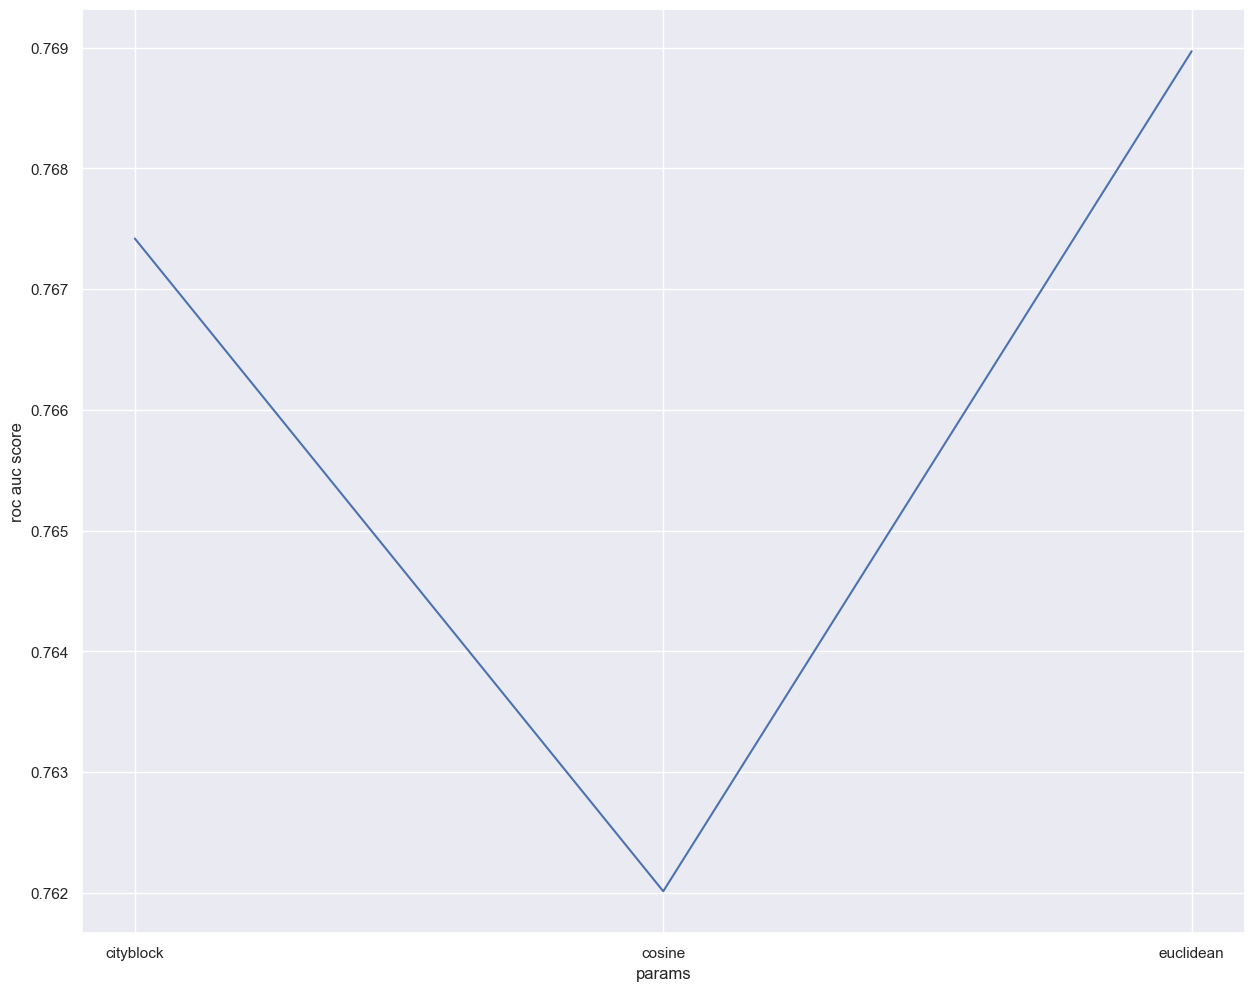

In [390]:
params = ['cityblock', 'cosine', 'euclidean']

model = search_best_params(pipeline_knn, params, 'classifier__metric')

Best param =  195
With best csore =  0.8295955808079849


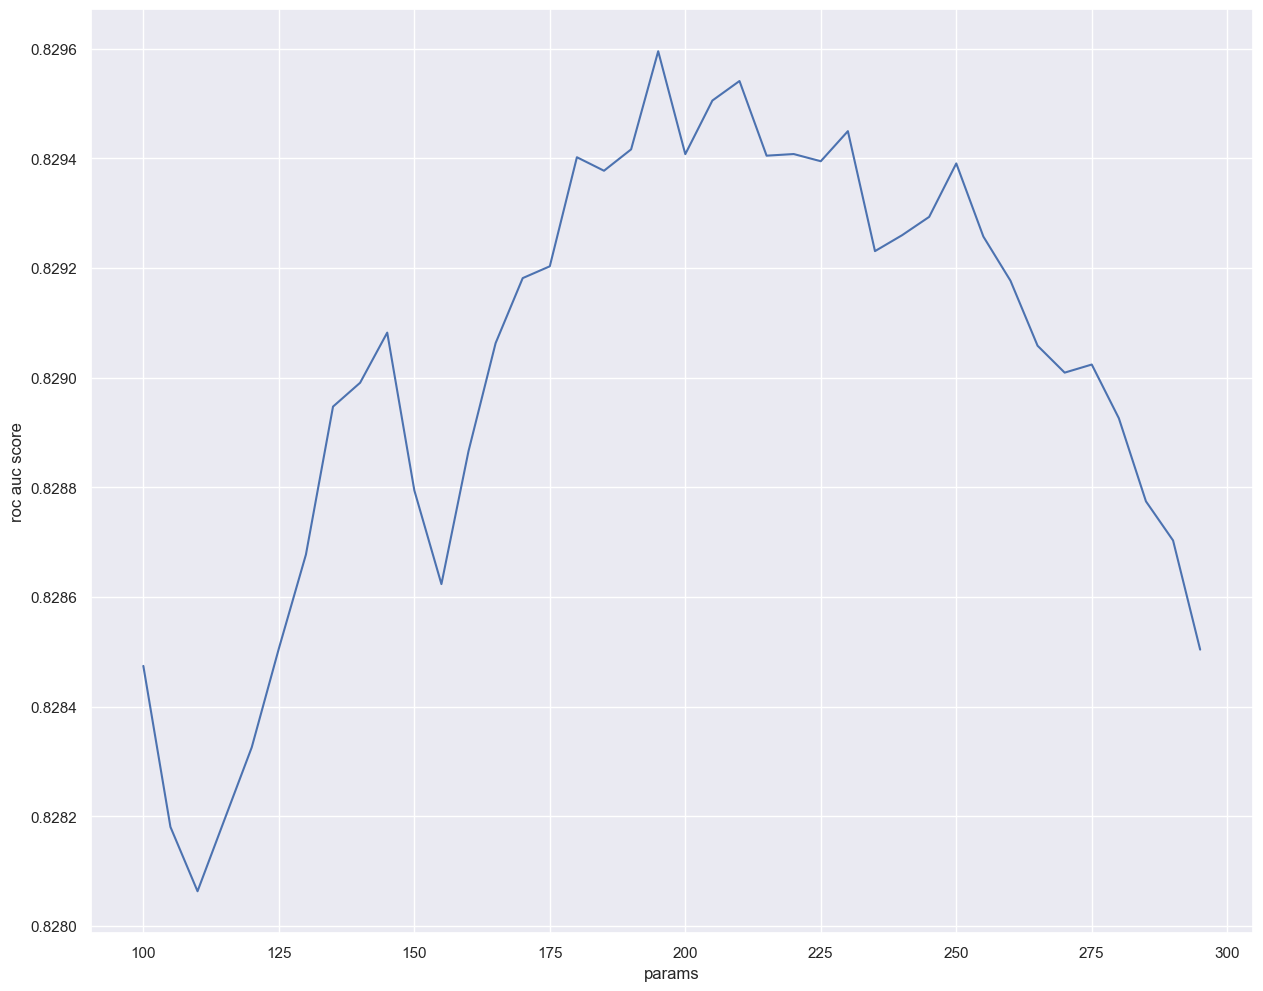

In [391]:
params = 5 * (20 + np.arange(40))

model = search_best_params(pipeline_knn, params, 'classifier__n_neighbors')

Лучшее решение отправьте в Stepik.

In [403]:
X_test = pd.read_csv('./test.csv')
X_test.loc[X_test['TotalSpent'] == ' ', 'TotalSpent'] = '0'
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)

In [394]:
y_pred = model.predict(X_test)
ans = pd.DataFrame()
ans['id'] = np.arange(len(y_pred))
ans[target_col] = y_pred

ans
ans.to_csv("ans.csv", encoding='utf-8', index=False)

Качество: 0.71722 - :\

### Итого

In [407]:
best_model = log_model


In [408]:
y_pred = best_model.predict(X_test)
ans = pd.DataFrame()
ans['id'] = np.arange(len(y_pred))
ans[target_col] = y_pred

ans
ans.to_csv("ans.csv", encoding='utf-8', index=False)